<h1 style="text-align: center; color: purple;" markdown="1">Assignment 4: Tables </h1>

<h2 style="text-align: center; color: #012169" markdown="1"> ECON220 Python Lab</h2>

<h3 style="text-align: center; color: #012169" markdown="1"> Author: Gavin Mason</h3>

### Table of Contents 
* [Descriptive Stats using Tables](#anchor1)

In [71]:
# Import packages 
import numpy as np
import pandas as pd
import seaborn as sns

# Descriptive Stats using Tables <a class = anchor id= anchor1></a>

In this assignment we are going to use data from the Econometrics book that you will use in your econometrics class. 

We will be using the data set mroz you can see the description of the variables [here](http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.des)

Once you have seen what this data is about, and the description of he variables.

1. Import it into python using `read_stata()` function from pandas, the link to get the data is http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta
 * check the info() of the dataset to see what variables are in it. 
 
 * use the function set() to see the values that the variable city and inlf can take ( This is a quick alternative to value counts to just see the values a variable can take). 
 * Check the code that changes these variables into categorical variables for the purpose of these tables

2. Use the function `value_counts()` and `crosstab()` to:

 * Do a table with the proportion of peple in the city vs not, city variable, 
 * Make another table with the proportion of city by in the labor force (inlf). 

3. Use the `groupby()` and `agg()` methods from the Pandas package to: Calculate the average education by the city variable

4. Create two correlation tables for educ and mother education and educ and father education

5. Use `pivot_table()` to calculate the average mother education and father education by the city and inlf variables 

6. Use `heatmap()` to add color to the table in 5. 


In [72]:
mroz = pd.read_stata("http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta")
mroz.info()
print("Values for city variable", set(mroz.city))
print("Values for inlf variable", set(mroz.inlf))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      753 non-null    float32
 1   hours     753 non-null    float32
 2   kidslt6   753 non-null    float32
 3   kidsge6   753 non-null    float32
 4   age       753 non-null    float32
 5   educ      753 non-null    float32
 6   wage      428 non-null    float32
 7   repwage   753 non-null    float32
 8   hushrs    753 non-null    float32
 9   husage    753 non-null    float32
 10  huseduc   753 non-null    float32
 11  huswage   753 non-null    float32
 12  faminc    753 non-null    float32
 13  mtr       753 non-null    float32
 14  motheduc  753 non-null    float32
 15  fatheduc  753 non-null    float32
 16  unem      753 non-null    float32
 17  city      753 non-null    float32
 18  exper     753 non-null    float32
 19  nwifeinc  753 non-null    float32
 20  lwage     428 non-null    float3

In [73]:
#Change city and inlf from number to categorical variables so the tables are better 
mroz.city= mroz.city.astype("category")
mroz.inlf= mroz.inlf.astype("category")
mroz.city = mroz.city.cat.rename_categories({0: "outcity", 1: "city"})
mroz.inlf = mroz.inlf.cat.rename_categories({0: "not in LF", 1: "in LF"})

In [74]:
print("Percentages of people in city vs not")
mroz.city.value_counts(normalize=True)

Percentages of people in city vs not


city       0.642762
outcity    0.357238
Name: city, dtype: float64

In [75]:
pd.crosstab(index = mroz.city, 
            columns = mroz.inlf , normalize=True)

inlf,not in LF,in LF
city,,
outcity,0.152722,0.204515
city,0.278884,0.363878


In [76]:
mroz.groupby(mroz["city"]).educ.agg(["mean"])

,mean
city,
outcity,11.799256
city,12.557851


In [77]:
mroz[['educ', 'motheduc']].corr()


,educ,motheduc
educ,1.000000,0.435336
motheduc,0.435336,1.000000


In [78]:
mroz[['educ', 'fatheduc']].corr()


,educ,fatheduc
educ,1.000000,0.442458
fatheduc,0.442458,1.000000


In [79]:
mroz.pivot_table(values=["motheduc", "fatheduc"], 
                index=["inlf", "city"], aggfunc='mean').round(2)

fatheduc  motheduc
inlf      city                       
not in LF outcity      8.03      8.38
          city         8.87      9.19
in LF     outcity      8.12      9.36
          city         9.48      9.60

In [80]:
tabl1 = pd.crosstab(index = [mroz.inlf,mroz.city], 
            columns =[mroz.motheduc,mroz.fatheduc]).agg("mean")

[Text(0.5, 1.0, 'Average father education and mother education by city living and labor force participation'),
 Text(32.99999999999999, 0.5, 'City living and labor force participation'),
 Text(0.5, 15.0, 'Averages')]

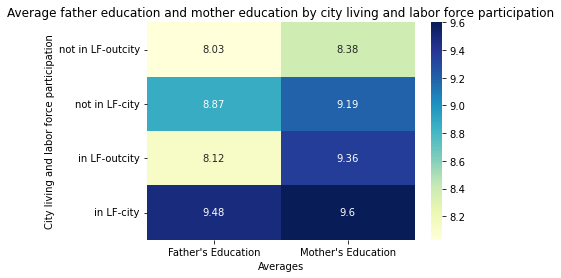

In [81]:
sns.heatmap(tabll,
           cmap="YlGnBu", 
            annot=True, 
            xticklabels = ["Father's Education", "Mother's Education"],
            fmt='g').set(title="Average father education and mother education by city living and labor force participation",
                        ylabel= "City living and labor force participation",
                        xlabel="Averages")

&nbsp;

<hr />

<p style="text-align: center;">ECON220 Python Programming Laboratory</a></p>
<p style="text-align: center;">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="text-align: center;"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="text-align: center;">Department of Economics</a></p>
<p style="text-align: center;">Emory University</a></p>

&nbsp;

In [82]:
# !jupyter nbconvert --to html nameoffile.ipynb